<a href="https://colab.research.google.com/github/yoosoo13/hongonganalysis_withPython/blob/main/%ED%98%BC%EA%B3%B5%ED%8C%8C/%ED%98%BC%EA%B3%B5%ED%8C%8C6_%EB%A7%B7%ED%94%8C%EB%A1%AF%EB%A6%BD_%EA%B3%A0%EA%B8%89%EA%B8%B0%EB%8A%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 맷플롯립 고급기능
- 그래프에 범례 추가
- 선 그래프, 막대 그래프를 동시에 여러개 그리는 방법
- 데이터프레임의 피벗 테이블 기능


________
<실습준비>

In [1]:
# 한글폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 한글 폰트 설정
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

한글폰트 설치, 설정 후에는 항상 런타임 중단 후 다시 실행해야함!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 그래프 DPI 기본값 변경
plt.rcParams['figure.dpi']=100

In [4]:
# 실습 파일 불러오기
import gdown
gdown.download('https://bit.ly/3pK7iuu', 'ns_book7.csv', quiet=False)

ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
ns_book7.head()

Downloading...
From: https://bit.ly/3pK7iuu
To: /content/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:00<00:00, 144MB/s]


,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


_______


```
[예시]
Q. 10개의 출판사 중 어느 출판사가 어떤 연도에 도서를 가장 많이 발행했는가?
  - 각 출판사마다 피겨를 생성해서 그래프 그리는 것이 아닌
  A. 하나의 피겨에 10개의 출판사 그래프를 모두 그리면 데이터를 비교하기 쉬움
    (즉, 선 그래프를 그리는 plot()함수를 여러번 호출하기)
```

In [5]:
# 출판사에 대한 '발행년도'별 '대출건수' 그래프를 그리기 위해 데이터를 살짝 변경해보자~

# data가 많으니, 상위 30위 정도의 고유한 출판사 목록 추출
top30_pubs = ns_book7['출판사'].value_counts()[:30]

# 상위 30위에 해당하는 출판사는 True로 표시하는 불리언 배열로 반환
top30_pubs_idx = ns_book7['출판사'].isin(top30_pubs.index)

In [6]:
# 상위 30위에 해당하는 '출판사', '발행년도', '대출건수'열만 추출한 데이터프레임 생성
ns_book9 = ns_book7[top30_pubs_idx][['출판사', '발행년도', '대출건수']]

In [7]:
# '출판사'와 '발행년도'열을 기준으로 행 모으기(groupby()메서드 활용) → sum()메서드로 '대출건수'열의 합 계산
ns_book9 = ns_book9.groupby(by=['출판사', '발행년도']).sum()

In [8]:
# ns_book9의 인덱스는 '출판사', '발행년도' 열이다. 인덱스를 초기화 하자(reset_index()메서드 호출)
ns_book9 = ns_book9.reset_index()

# '민음사'라는 출판사의 데이터를 확인해보자
ns_book9[ns_book9['출판사'] == '민음사'].head()

,출판사,발행년도,대출건수
246,민음사,1974,1
247,민음사,1986,0
248,민음사,1989,4
249,민음사,1990,2
250,민음사,1991,137


## 하나의 피겨에 '선 그래프' 여러개 그리기

### 선 그래프 2개 그려보자
  1. 2개의 출판사 데이터를 생성
  2. '발행년도'에 대한 '대출건수' 선 그래프를 그려보기
    - 출판사 별로 각각 데이터프레임 생성
  3. line1, line2 데이터프레임의 '발행년도'열과 '대출건수' 열로 plot()함수를 두 번 호출


In [11]:
# 1,2. 2개의 출판사 데이터 생성 → 출판사 별로 각각 데이터프레임 생성
line1 = ns_book9[ns_book9['출판사'] == '민음사']
line2 = ns_book9[ns_book9['출판사'] == '김영사']

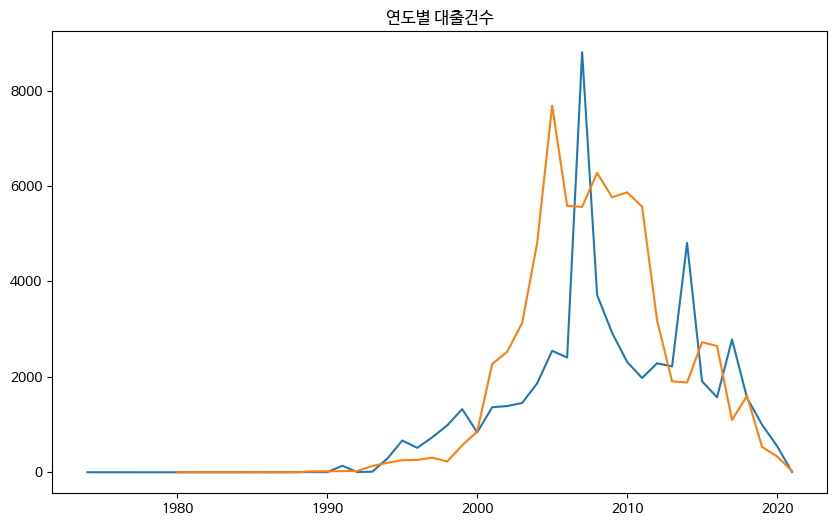

In [12]:
# 3. line1, line2 데이터프레임의 '발행년도'열과 '대출건수'열로 plot()함수를 2번 호출-서브플롯활용
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(line1['발행년도'], line1['대출건수']) # '민음사'출판사 선그래프
ax.plot(line2['발행년도'], line2['대출건수']) # '문학세계사'출판사 선그래프
ax.set_title('연도별 대출건수')
fig.show()

- 선이 많아지면, 구분하기 어렵다.
- 그래프에 범례_legend추가하여 그래프 이해도를 높이자.
  - plot()를 호출할 때 각 선 그래프에 레이블추가, 마지막에 legend()메서드를 호출하면 범례 추가됨

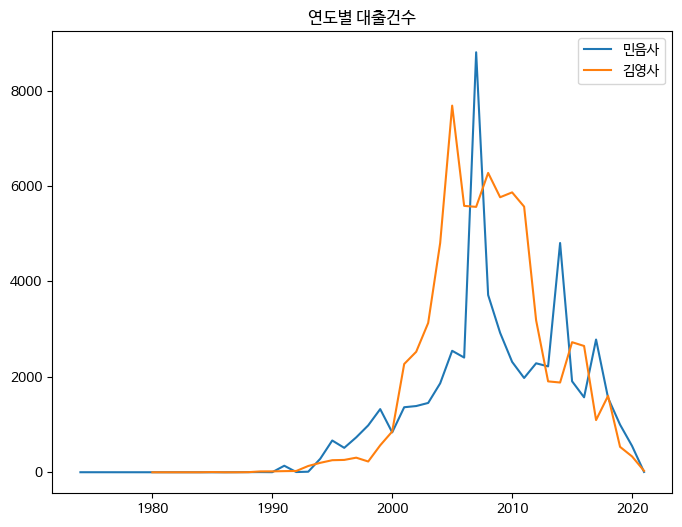

In [13]:
# 그래프에 범례 추가_legend()메서드 사용
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(line1['발행년도'], line1['대출건수'], label = '민음사')
ax.plot(line2['발행년도'], line2['대출건수'], label = '김영사')
ax.set_title('연도별 대출건수')
ax.legend()
fig.show()

### 선 그래프 5개 그려보자
- top30_pubs의 인덱스에 있는 상위 5개 출판사의 '발행년도'에 대한 '대출건수' 그래프를 그려보자
  - 이번에는 상위 5개 출판사에 대한 데이터프레임을 각각 생성하지 않고
  - for문과 슬라이스 연산자를 사용해 선 그래프 그려보자

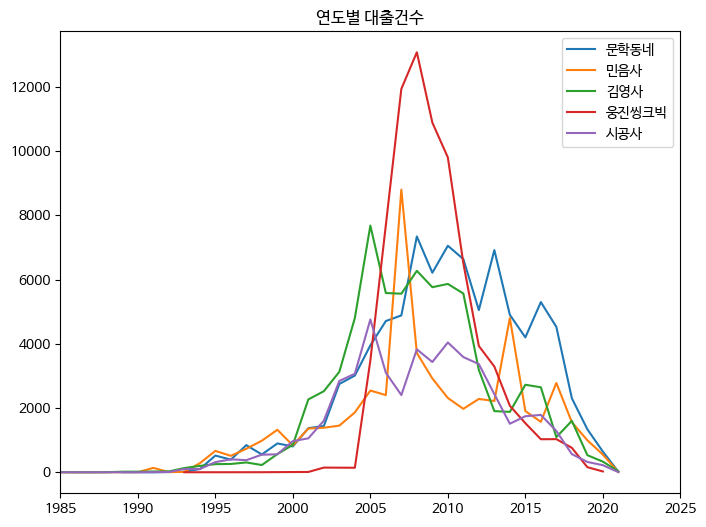

In [16]:
fig, ax = plt.subplots(figsize=(8,6))
for pub in top30_pubs.index[:5]:
  line = ns_book9[ns_book9['출판사'] == pub]  # 상위 5개 출판사가 선택됨
  ax.plot(line['발행년도'], line['대출건수'], label=pub)  # 상위 5개 출판사에 대한 선 그래프를 그림
ax.set_title('연도별 대출건수')
ax.legend()
ax.set_xlim(1985, 2025) # x축 범위(1985~2025)로 선택
fig.show()

- 범례를 추가했지만, 그래프에서 5개의 출판사를 구분하기는 쉽지 않다.(각 선 그래프가 서로 많이 교차하기 때문)
- 이런 경우에는 선 그래프보다는 '스택 영역 그래프'를 그리는게 좋다

## 스택 영역 그래프_stackplot()
- stacked area graph

<img src = "https://drive.google.com/uc?id=1ne59P3m06dsez1xnKWn4aL8S7A7yt2vg" height = 200 width = 500>

```
선 그래프 위에 다른 선 그래프를 차례대로 쌓는 것
그래프 사이의 간격이 y축의 값이 됨
```

[예시]

<img src = "https://drive.google.com/uc?id=1EoO-N0GTIZb-b3HAAxfxm5nGM0ySS82C" height = 200 width = 500>

```
첫 번째 매개변수에 x축의 값 '발행년도'를 전달
두 번째 매개변수에 y축의 값을 2차원 배열로 전달
```

[단계별 정리]
1. pivot_table()메서드로 각 '발행년도' 열의 값을 열로 바꾸기
  - y축에 넣을 2차원 배열을 생성
2. '발행년도'열을 리스트 형태로 바꾸기
  - x축에 넣을 리스트를 생성
3. stackplot()메서드로 스택 영역 그래프 그리기

### [단계1]
- pivot_table()메서드로 각 '발행년도' 열의 값을 열로 바꾸기
- pivot_table()메서드사용(index매개변수, columns매개변수에 원본 데이터프레임의 열을 지정)

In [17]:
# 현재, index매개변수-'출판사'열, columns매개변수-'발행년도'열 지정하기
ns_book10 = ns_book9.pivot_table(index='출판사', columns='발행년도')
ns_book10.head()

대출건수                                               ...                  \
발행년도 1947 1974 1975 1976 1977 1978 1979 1980 1981 1982  ...    2013    2014   
출판사                                                     ...                   
博英社   0.0  NaN  0.0  NaN  0.0  NaN  NaN  NaN  NaN  NaN  ...     NaN   118.0   
길벗    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1162.0  1619.0   
김영사   NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  0.0  ...  1905.0  1881.0   
넥서스   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1828.0  1429.0   
다산북스  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1100.0  1361.0   

                                                               
발행년도    2015    2016    2017    2018   2019   2020  2021 2030  
출판사                                                            
博英社     57.0    47.0     2.0     8.0    NaN    1.0   NaN  NaN  
길벗    1410.0  1597.0  1626.0  1004.0  773.0  292.0  12.0  NaN  
김영사   2726.0  2647.0  1094.0  1602.0  533.0  332.0  30.0  NaN  
넥서스    765.0  1146.0   932.0   565.0   90.0   15.0   0.0  NaN  
다산북스  1321.0  1137.0  1249.0   773.0  530.0  127.0  13.0  NaN  

[5 rows x 50 columns]

- 열이 다단으로 구성되어 있다.
  - 첫 번째 열을 보면 1947이 아닌 ('대출건수', 1947)이다.

In [18]:
# ns_book10의 columns속성 확인
ns_book10.columns[:10]

MultiIndex([('대출건수', 1947),
            ('대출건수', 1974),
            ('대출건수', 1975),
            ('대출건수', 1976),
            ('대출건수', 1977),
            ('대출건수', 1978),
            ('대출건수', 1979),
            ('대출건수', 1980),
            ('대출건수', 1981),
            ('대출건수', 1982)],
           names=[None, '발행년도'])

### [단계2]
- 상위 10개의 출판사 이름과 x축에 놓을 '발행년도'리스트 준비
- 즉, '발행년도'열을 리스트 형태로 바꾸기
- get_level_values()메서드 사용
  - ('대출건수', 1947)에서 1947만 가져옴

In [20]:
top10_pubs = top30_pubs.index[:10]
year_cols = ns_book10.columns.get_level_values(1)

### [단계3]
- stackplot()메서드로 스택 영역 그래프 그리기
- x축 값: year_cols, y축 값: ns_book10에서 상위 10개 출판사에 해당하는 행을 골라 전달
- legend()메서드는 loc매개변수로 그래프의 범례의 위치를 지정할 수 있음

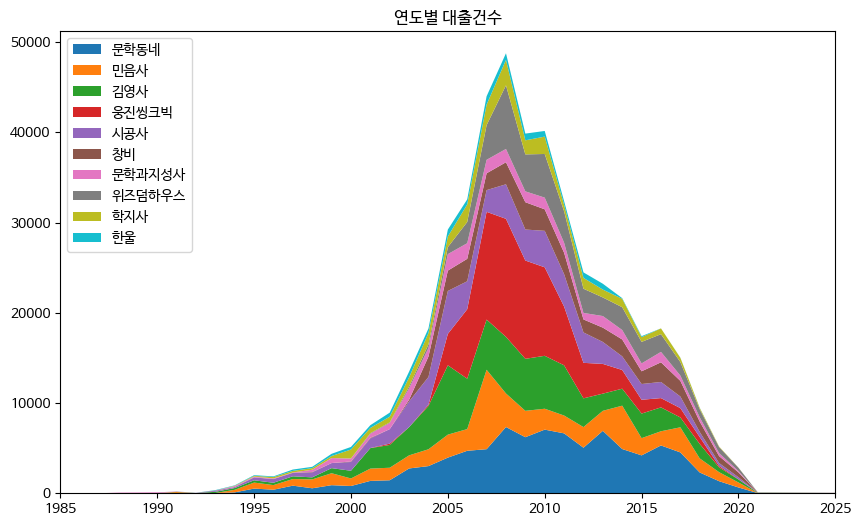

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
ax.stackplot(year_cols, ns_book10.loc[top10_pubs].fillna(0),  # fillna(0)으로 누락된 값을 0으로 채워 그래프에러를 막음
             labels=top10_pubs)
ax.set_title('연도별 대출건수')
ax.legend(loc='upper left')  # 범례를 왼쪽 상단에 표시하는 것
ax.set_xlim(1985, 2025)
fig.show()

```
2010년 경의 그래프 면적을 보면 '문학동네'와 '웅진씽크빅'의 대출건수가 높다는 것을 확인할 수 있다.
```

_________

## 하나의 피겨에 '막대 그래프' 여러개 그리기